## Importing libraries and loading dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\KIIT\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#loading and reading the dataset
titanic_data=pd.read_csv('titanic_train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
Inspecting the dataframe

In [4]:
titanic_data.shape

(891, 12)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Since, there are null values in age column so we need to clean the data first.

## Data Cleaning

In [9]:
#check null values
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

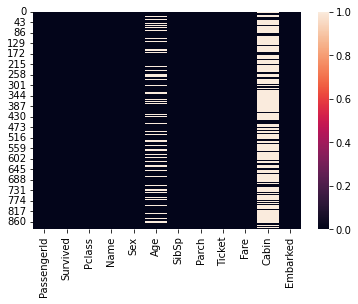

In [10]:
#visualize null value using heatmap
sns.heatmap(titanic_data.isna())

##  Filling NaN values

In [12]:
# Fill the null values
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)   #fill all the NaN values in the Age column of the titanic_data DataFrame with the mean of the Age column

In [13]:
#verifying null value in age column
titanic_data['Age'].isna().sum()

0

In [16]:
# checking null
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

###### Dropping unnecessary columns

In [14]:
#dropping cabin column as it contains many null values 
titanic_data.drop('Cabin',axis=1,inplace=True)

In [18]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


###### DATA CLEANED!!

## DATA ANALYSIS AND VISUALIZATION


###### Finding out how many survived vs Died using countplot method of seaboarn

<AxesSubplot:xlabel='Survived', ylabel='count'>

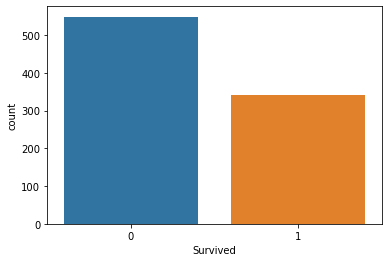

In [44]:
#countplot of subrvived vs not  survived
sns.countplot(x='Survived',data=titanic_data)

Here,from the above graph we can see that number of persons survived is around 300 and number of persons died are more than 500 

<AxesSubplot:xlabel='Survived', ylabel='count'>

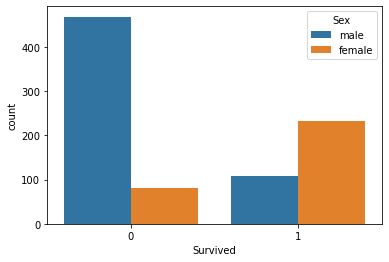

In [45]:
#Male vs Female Survived?
sns.countplot(x='Survived',data=titanic_data,hue='Sex')

In this graph, we found that number of males survival is more than female.

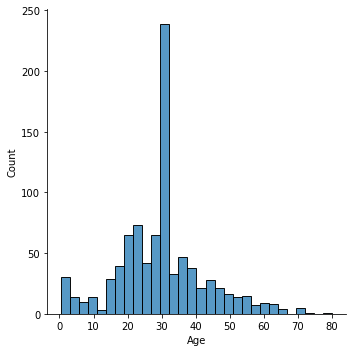

In [46]:
#find the distribution for the age column
sns.displot(x='Age',data=titanic_data)

Here, we can see that people belong to the age group of 30 is the highest.

###### Preparing Data for Model

###### Now we would convert Sex Column to dummies numerical values.

In [22]:
#convert sex column to numerical values i.e 1 for male and 0 for female
gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [24]:
titanic_data['Gender']=gender
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1


Now in gender column 1 indicates male and 0 indicates female.

In [26]:
#selected columns that are required for prediction
selected_columns = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare','Gender']
titanic_df = titanic_data[selected_columns]
titanic_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.000000,1,0,7.2500,1
1,2,1,1,38.000000,1,0,71.2833,0
2,3,1,3,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,1
887,888,1,1,19.000000,0,0,30.0000,0
888,889,0,3,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


###### We will use titanic_df dataframe for predictions

In [33]:
#Seperate Dependent and Independent variables
x=titanic_df[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=titanic_df['Survived']

In [34]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Data Modelling


In [35]:
#import train test split method
from sklearn.model_selection import train_test_split

In [36]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [37]:
#import Logistic  Regression
from sklearn.linear_model import LogisticRegression
#Fit  Logistic Regression 
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
#predict
predict=lr.predict(x_test)

### DATA Testing

In [39]:
#print confusion matrix 
from sklearn.metrics import confusion_matrix

In [49]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted Not survived','Predicted survived'],index=['Actual No','Actual Yes'])

,Predicted Not survived,Predicted survived
Actual No,151,24
Actual Yes,38,82


###### Accuracy

In [41]:
#import classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.77      0.68      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.77      0.78       295
weighted avg       0.79      0.79      0.79       295



###### Precision is fine for the Selected model and the Data.

Accuracy can be increased by further using more features (which we dropped earlier) and/or by using other model.
Precision : Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
Recall : Recall is the ratio of correctly predicted positive observations to the all observations in actual class F1 score - F1 Score is the weighted average of Precision and Recall.
